In [1]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,BatchNormalization,Flatten



In [2]:
img = image.load_img("C:\\Users\\Anish thapa\\Desktop\\chest\\chest_xray\\test\\IM-0003-0001.jpeg")

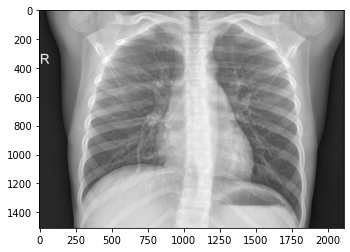

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:\\Users\\Anish thapa\\Desktop\\chest\\chest_xray\\test\\IM-0003-0001.jpeg").shape  

(1509, 2111, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)  # COnverting the images size in the form of zero
test = ImageDataGenerator(rescale=1/255) 
val_dataset = ImageDataGenerator(rescale=1/255)

In [6]:
train = train.flow_from_directory("C:\\Users\\Anish thapa\\Desktop\\chest\\chest_xray\\train",target_size = (260,260,),batch_size=32,class_mode = 'binary')
test = test.flow_from_directory("C:\\Users\\Anish thapa\\Desktop\\chest\\chest_xray\\test",target_size = (260,260,),batch_size=32,class_mode = 'binary')
val_dataset = val_dataset.flow_from_directory("C:\\Users\\Anish thapa\\Desktop\\chest\\chest_xray\\val",target_size = (260,260,),batch_size=32,class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Found 16 images belonging to 2 classes.


In [7]:
train_dataset = train.class_indices  #checking the classes of class mode binary

In [8]:
train_dataset

{'NORMAL': 0, 'PNEUMONIA': 1}

In [9]:
train.classes              

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
# Applying CNN model
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (260,260,3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    #
                                     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                    
                                     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                     tf.keras.layers.Flatten(),
                                    #
                                     tf.keras.layers.Dense(512,activation = 'relu'),
                                    #
                                     tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    
                                     
                                    
                            
    
])

In [11]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',
                  metrics = ['accuracy'])


In [12]:
model_fit = model.fit(train,steps_per_epoch = 3,epochs = 10,validation_data = val_dataset )

Epoch 1/10
3/3 [==============================] - 15s 4s/step - loss: 3.6932 - accuracy: 0.6458 - val_loss: 1.9259 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 10s 3s/step - loss: 1.5882 - accuracy: 0.3958 - val_loss: 1.3475 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 10s 3s/step - loss: 0.6696 - accuracy: 0.7083 - val_loss: 1.0249 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 10s 3s/step - loss: 0.9146 - accuracy: 0.5625 - val_loss: 1.2493 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 13s 5s/step - loss: 0.6745 - accuracy: 0.7500 - val_loss: 1.0878 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 14s 4s/step - loss: 0.5412 - accuracy: 0.7812 - val_loss: 0.7408 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 11s 3s/step - loss: 0.5794 - accuracy: 0.7292 - val_loss: 0.7157 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==================

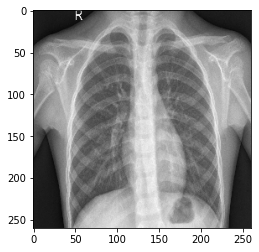

You are suffering from pneumenia


In [16]:
dir_path = "C:\\Users\\Anish thapa\\Desktop\\chest\\chest_xray\\test"

for i in os.listdir(dir_path):
    img = image.load_img( dir_path + '//' + i,target_size = (260,260))
    plt.imshow(img)
    plt.show()
    
    X= image.img_to_array(img)
    X= np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val ==0:
        print("Normal")
    else:
        print("You are suffering from pneumenia")
        
        
        break
        
        
    